<a href="https://colab.research.google.com/github/AaryanAnand10/Drug-Performance-Evaluation/blob/main/Drug_Performance_Evaluation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Packages and Data:

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv('/content/Drug_clean.csv')

Data Inspecting and Cleaning:

In [5]:
df.head(5)

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type
0,Acute Bacterial Sinusitis,Amoxicillin,3.852353,3.655882,Capsule,On Label,12.590000,86.294118,3.197647,RX
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.470000,3.290000,Liquid (Drink),Off Label,287.370000,43.000000,2.590000,RX
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.121429,2.962857,Tablet,On Label,70.608571,267.285714,2.248571,RX
3,Acute Bacterial Sinusitis,Ampicillin,2.000000,3.000000,Capsule,On Label,12.590000,1.000000,1.000000,RX
4,Acute Bacterial Sinusitis,Ampicillin,3.250000,3.000000,Tablet,On Label,125.240000,15.000000,3.000000,RX


In [43]:
df.shape

(628, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     685 non-null    object 
 1   Drug          685 non-null    object 
 2   EaseOfUse     685 non-null    float64
 3   Effective     685 non-null    float64
 4   Form          685 non-null    object 
 5   Indication    685 non-null    object 
 6   Price         685 non-null    float64
 7   Reviews       685 non-null    float64
 8   Satisfaction  685 non-null    float64
 9   Type          685 non-null    object 
dtypes: float64(5), object(5)
memory usage: 53.6+ KB


In [9]:
#Checking missing values:
df.isna().sum()

Condition       0
Drug            0
EaseOfUse       0
Effective       0
Form            0
Indication      0
Price           0
Reviews         0
Satisfaction    0
Type            0
dtype: int64

In [10]:
# Drop all duplicates:
df = df.drop_duplicates()

In [11]:
# Checking if there's any negative value within each numerical column:
num_cols = ['EaseOfUse', 'Effective', 'Price', 'Reviews', 'Satisfaction']
(df[num_cols] < 0).any().any()

False

Inspecting the distribution of the numerical variables

Frequency of the categorical variables:

In [12]:
df.replace('\r\r\n', np.nan, inplace=True)
df.isna().sum()

Condition       0
Drug            0
EaseOfUse       0
Effective       0
Form            0
Indication      8
Price           0
Reviews         0
Satisfaction    0
Type            5
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df)
df = pd.DataFrame( imputer.transform(df),columns=df.columns)
df.head()

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type
0,Acute Bacterial Sinusitis,Amoxicillin,3.852353,3.655882,Capsule,On Label,12.59,86.294118,3.197647,RX
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.47,3.29,Liquid (Drink),Off Label,287.37,43.0,2.59,RX
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.121429,2.962857,Tablet,On Label,70.608571,267.285714,2.248571,RX
3,Acute Bacterial Sinusitis,Ampicillin,2.0,3.0,Capsule,On Label,12.59,1.0,1.0,RX
4,Acute Bacterial Sinusitis,Ampicillin,3.25,3.0,Tablet,On Label,125.24,15.0,3.0,RX


In [14]:
df.isna().sum()

Condition       0
Drug            0
EaseOfUse       0
Effective       0
Form            0
Indication      0
Price           0
Reviews         0
Satisfaction    0
Type            0
dtype: int64

In [15]:
importantConditions = df.Condition.value_counts()[df.Condition.value_counts()>9].index

In [16]:
#keeping only the frequent conditions
df = df[df.Condition.isin(importantConditions)]

In [17]:
cat_cols = df.dtypes[df.dtypes=="object"].index
for col in cat_cols:
    factorize = pd.factorize(df["Condition"])
    df[f"{col}_Encode"] = factorize[0]
df.head()

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type,Condition_Encode,Drug_Encode,EaseOfUse_Encode,Effective_Encode,Form_Encode,Indication_Encode,Price_Encode,Reviews_Encode,Satisfaction_Encode,Type_Encode
0,Acute Bacterial Sinusitis,Amoxicillin,3.852353,3.655882,Capsule,On Label,12.59,86.294118,3.197647,RX,0,0,0,0,0,0,0,0,0,0
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.47,3.29,Liquid (Drink),Off Label,287.37,43.0,2.59,RX,0,0,0,0,0,0,0,0,0,0
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.121429,2.962857,Tablet,On Label,70.608571,267.285714,2.248571,RX,0,0,0,0,0,0,0,0,0,0
3,Acute Bacterial Sinusitis,Ampicillin,2.0,3.0,Capsule,On Label,12.59,1.0,1.0,RX,0,0,0,0,0,0,0,0,0,0
4,Acute Bacterial Sinusitis,Ampicillin,3.25,3.0,Tablet,On Label,125.24,15.0,3.0,RX,0,0,0,0,0,0,0,0,0,0


In [18]:
X = df[["Condition_Encode","Type_Encode","Price","Form_Encode","Indication_Encode","Drug_Encode","Reviews","EaseOfUse"]]
y = df["Effective"]

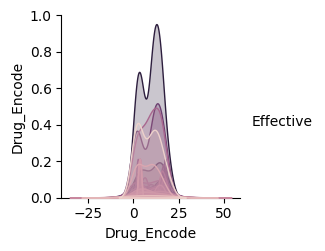

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
df_combined = pd.concat([X[["Drug_Encode"]], y], axis=1)

# Create a pair plot
sns.pairplot(df_combined, kind='scatter', hue='Effective')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [21]:
X_train.head()

,Condition_Encode,Type_Encode,Price,Form_Encode,Indication_Encode,Drug_Encode,Reviews,EaseOfUse
217,6,6,419.99,6,6,6,15.0,4.0
196,5,5,7.95,5,5,5,1.0,5.0
194,5,5,7.95,5,5,5,1.434783,4.21
530,17,17,143.99,17,17,17,133.0,4.14
26,1,1,397.03,1,1,1,30.333333,4.495


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train[["Price","Reviews"]])

MinMaxScaler()

In [23]:
X_train.head()

,Condition_Encode,Type_Encode,Price,Form_Encode,Indication_Encode,Drug_Encode,Reviews,EaseOfUse
217,6,6,419.99,6,6,6,15.0,4.0
196,5,5,7.95,5,5,5,1.0,5.0
194,5,5,7.95,5,5,5,1.434783,4.21
530,17,17,143.99,17,17,17,133.0,4.14
26,1,1,397.03,1,1,1,30.333333,4.495


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
def get_score(n):
    print("test : ",n, end=", ")
    model = RandomForestRegressor(n_estimators=n)
    cv_scores =-1* cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    return cv_scores.mean()

In [25]:
n_values = [10,20,30,35,40,45,50,55,60,65,70,80,100,120]
scores = [ get_score(n) for n in n_values]
n= n_values[scores.index(min(scores))]
n

test :  10, test :  20, test :  30, test :  35, test :  40, test :  45, test :  50, test :  55, test :  60, test :  65, test :  70, test :  80, test :  100, test :  120, 

80

In [26]:
scores = np.array(scores) *100
scores

array([54.67888385, 53.74158602, 54.37018226, 53.0237591 , 54.1007707 ,
       53.62595982, 54.19959369, 52.99746733, 52.98413363, 53.52404273,
       53.3625315 , 52.54895146, 53.98368972, 53.07487113])

In [27]:
n_values = np.array(n_values)

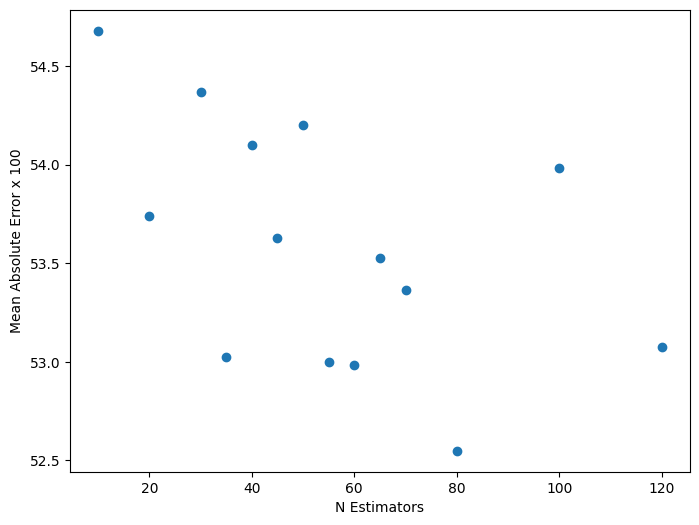

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.scatter(n_values,scores)
plt.xlabel('N Estimators')
plt.ylabel('Mean Absolute Error x 100')
plt.show()

In [29]:
model = RandomForestRegressor(n_estimators = n)
model.fit(X_train,y_train)
preds= model.predict(X_test)
mean_absolute_error(y_test,preds)

0.46165987744968245

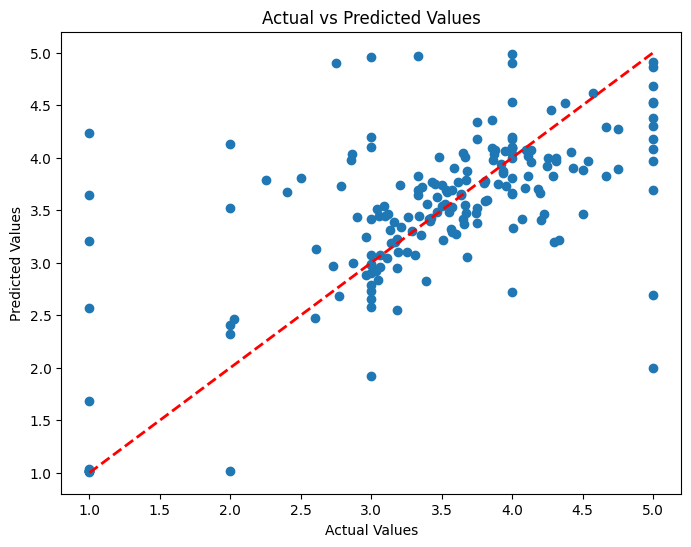

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

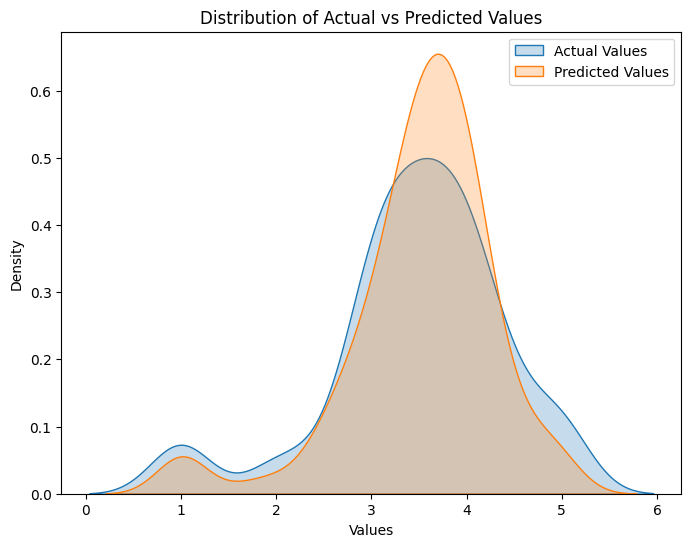

In [31]:
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label='Actual Values', fill=True)
sns.kdeplot(preds, label='Predicted Values', fill=True)
plt.title('Distribution of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()


Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
mean_absolute_error(y_test,y_preds)

0.4467375570670194

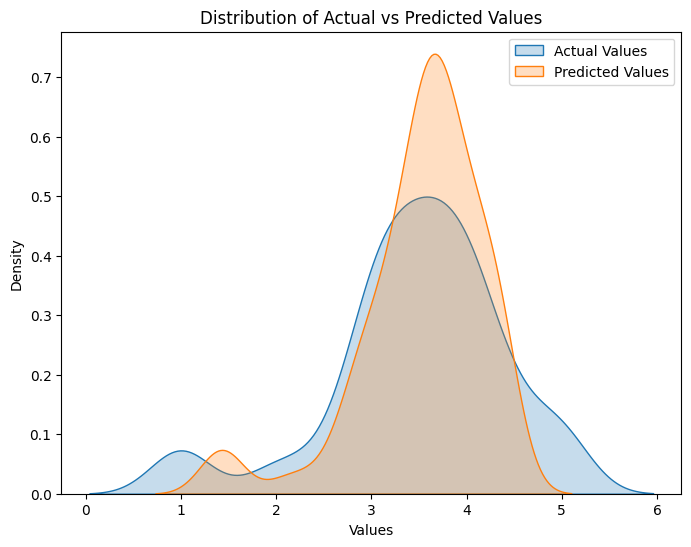

In [33]:
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label='Actual Values', fill=True)
sns.kdeplot(y_preds, label='Predicted Values', fill=True)
plt.title('Distribution of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

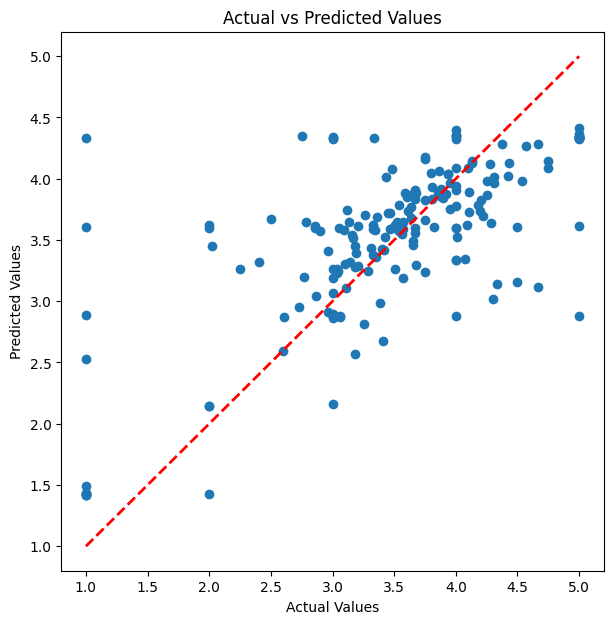

In [34]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_preds)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Support Vector Machine

In [35]:
from sklearn.svm import SVR

def get_score(kernel):
    model = SVR(kernel=kernel)
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)
    return mean_absolute_error(y_test,y_preds)


In [36]:
kernels = ["linear",'poly',"rbf","sigmoid"]
scores = [get_score(kernel) for kernel in kernels]
scores

[0.4467375570670194,
 0.4467375570670194,
 0.4467375570670194,
 0.4467375570670194]

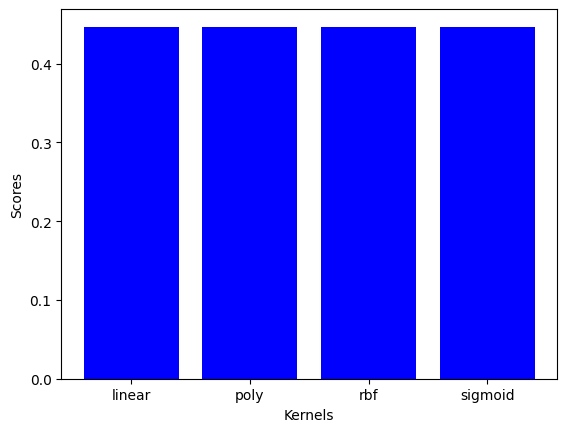

In [37]:
plt.bar(np.array(kernels), np.array(scores), color='blue')

# Adding labels and title
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.show()

In [38]:
model = SVR(kernel='linear')
model = LinearRegression()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)
mean_absolute_error(y_test,y_preds)

0.4467375570670194

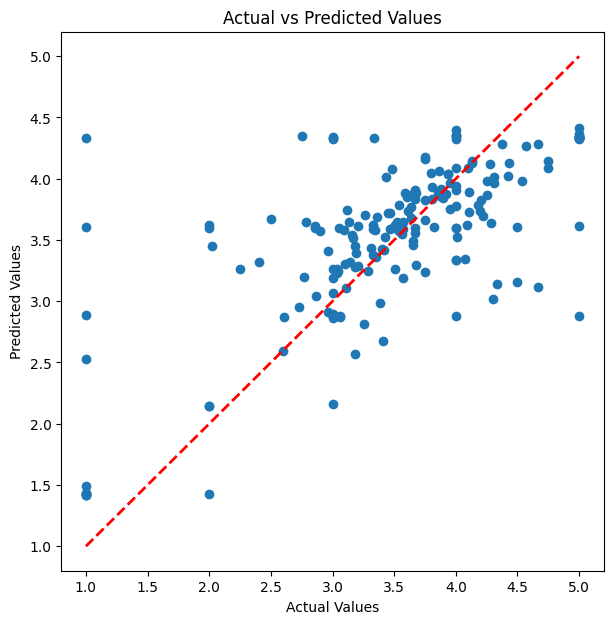

In [41]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_preds)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

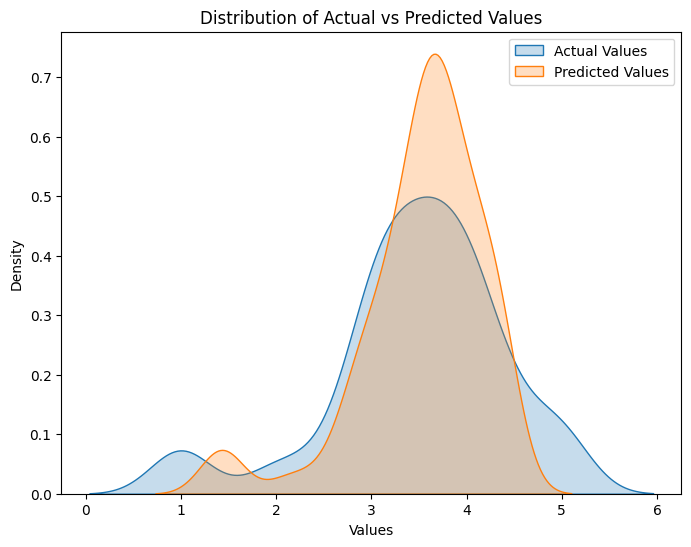

In [42]:
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label='Actual Values', fill=True)
sns.kdeplot(y_preds, label='Predicted Values', fill=True)
plt.title('Distribution of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()